# Project: Investigate a Dataset (No Show Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.
When a patient vists a doctor in a health facility, he/she is given an appointment most of the time. This is to follow up on the progress of the patient to ensure proper management.
This workbook aims to address the following questions:
> 1. What is the proportion of hypertension amongst the genders?
> 2. Does SMS influence showing up for appointments?
> 3. Which age group has the highest visit?
> 4. Which gender in a particular age group have a higher clinic visit?
> 5. Which gender in a particular age group have a highe show up rate?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\msami\Downloads\noshowappointments-kagglev2-may-2016.csv")
print("Shape: ", df.shape)
df.head()

Shape:  (110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
#getting familiar with our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>The  cell above shows that there are no missing values, next we check for duplicates

In [5]:
#check dataset for duplicates
df.duplicated().sum()

0

>**Our dataset has 110527 rows and 14 columns with no duplicates**

In [6]:
#check the numerical values in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>The cell above shows use the summary of the numerical values in the dataset. It can be seen that the age column has a negetive number which is impossible, this will be handled in the cleaning phase.

### Data Cleaning
At this stage, we clean the dataset to make easy to work with, it will be achieved by the following steps:
1. Dropping unnecessary columns
2. Converting column names to lower cases
3. Correcting spelling errors in column names
5. Drop rows with negative value for age
6. Rename "no-show" to "showed_up"
7. converting the values in the "showed up" column to 1 or 0 meaning the person came or not

In [7]:
#define a function to drop columns
def drop_cols(df, cols):
    for col in cols:
        df.drop(col, axis=1, inplace=True)
    return df

In [8]:
#drop unnecessary columns
cols= ["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"]
drop_cols(df, cols)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [9]:
#Converting column names to lower case
df.columns = df.columns.str.lower()
df.head(1)

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
#correct spelling errors on "hipertenstion" and "handcap"
df.rename(columns={"hipertension":"hypertension", "handcap":"handicap"}, inplace=True)

#confirm if changes where applied
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
#view the values in the age column
df["age"].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [12]:
#drop rows with age == 1
wrong_age = df[df["age"]== -1].index

df.drop(wrong_age, inplace=True)


In [13]:
#confirm if changes are applied
df["age"].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99],
      dtype=int64)

In [14]:
#Rename "no-show" column to "showed_up" for readability
df.rename(columns={"no-show":"showed_up"}, inplace=True)

In [15]:
#confirm changes
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [16]:
#correct labels of "showed_up" columns
df["showed_up"] = df["showed_up"].apply(lambda x:1 if x=="No" else 0)

In [17]:
#confirm changes are applied, the first row showed "NO"(meaning the person showed up for his appointment) should
# as 1
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1


>**Our data cleaning is now complete, next is to the analysis**

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### First let us have a general look of the dataset

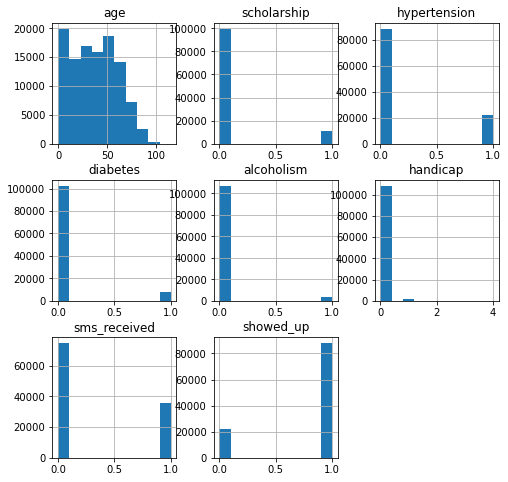

In [18]:
#visualize entire dataset
df.hist(figsize=(8,8));

The age is skewed to the right, all the other variables are categorical

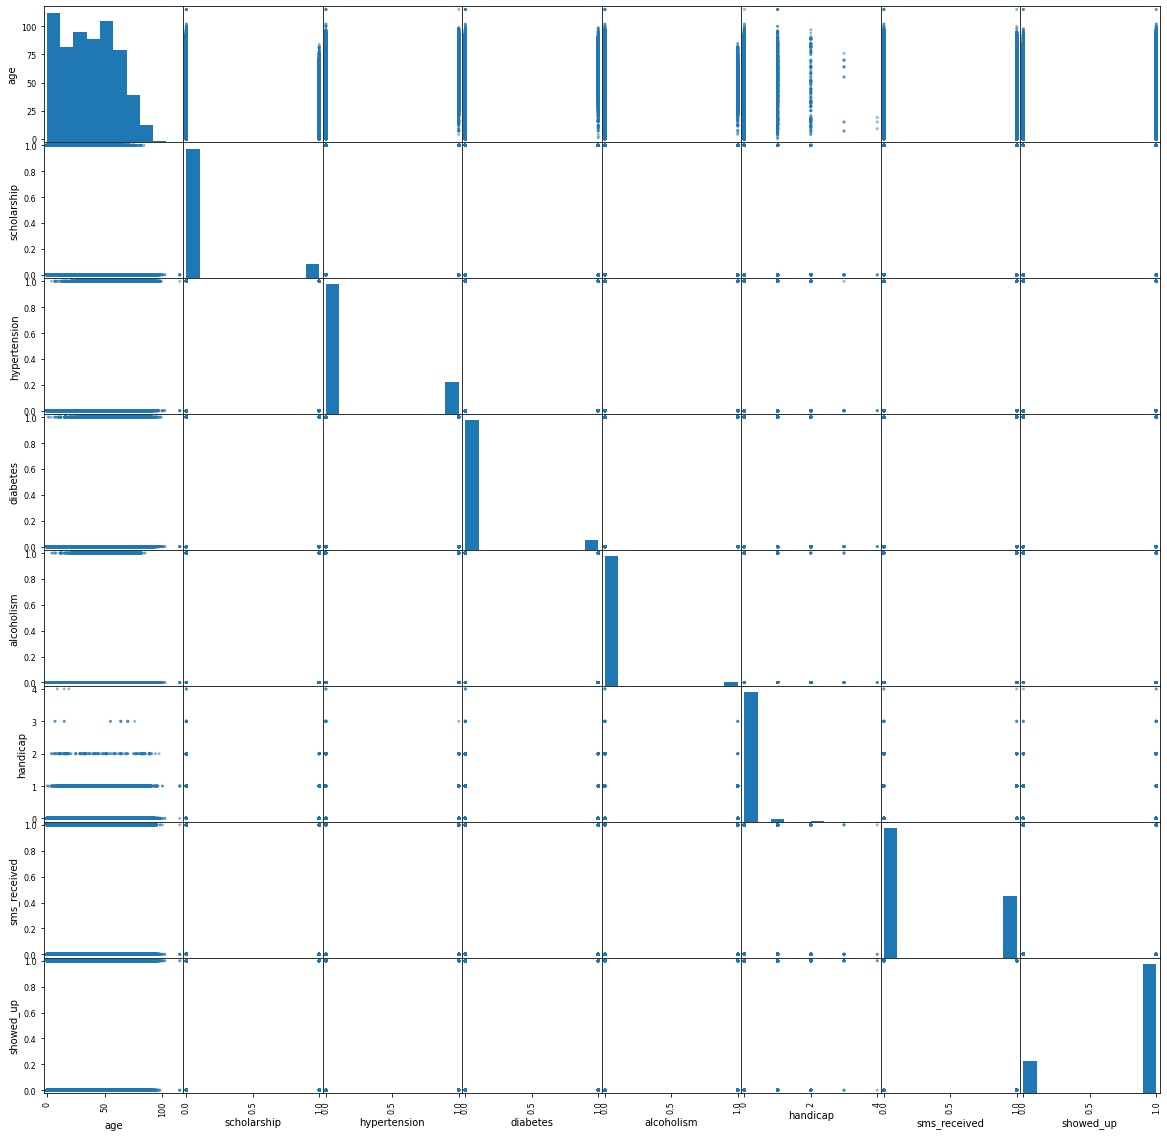

In [19]:
#gain insight onrelationship between variable
pd.plotting.scatter_matrix(df, figsize=(20,20));

### Is there any relationship between gender and hypertension?

In [20]:
#check the gender distribution in the dataset
df["gender"].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [21]:
#check the variation between the 2 genders having hypertension by mean, as there is a wide gap between there numbers
df.groupby("gender")["hypertension"].mean()

gender
F    0.213519
M    0.167033
Name: hypertension, dtype: float64

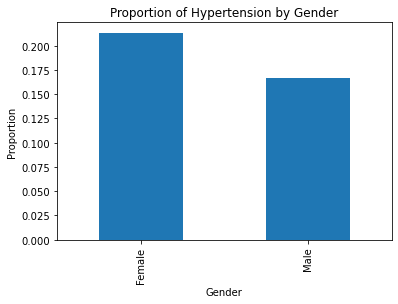

In [22]:
#plot the gender variation in terms of hypertension
df.groupby("gender")["hypertension"].mean().plot(kind="bar")

plt.xticks([0, 1], ["Female", "Male"])
plt.title('Proportion of Hypertension by Gender');
plt.xlabel("Gender");
plt.ylabel("Proportion");

> The above shows that the proportion of females with hypertension is higher than that of males

### Does receiving an SMS reminder affect keeping up to appointments?

In [23]:
#extract the patients that showed up for their appointments
df_yes = df.query("showed_up == 1")

In [24]:
#check the normalized value counts "sms_received" among those that showed up
df_yes["sms_received"].value_counts(normalize=True)

0    0.708663
1    0.291337
Name: sms_received, dtype: float64

Text(0.5, 1.0, 'Proportion of Those That Showed up With Relation to SMS')

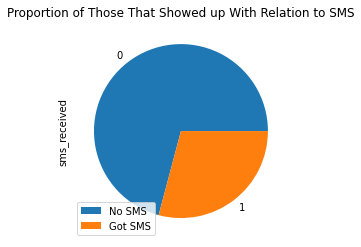

In [25]:
#plot the proportion of those that showed up in relation to receiving or not receiving an SMS
df_yes["sms_received"].value_counts(normalize=True).plot(kind="pie")
plt.legend(("No SMS","Got SMS"), loc="lower left")
plt.title("Proportion of Those That Showed up With Relation to SMS")

>The above plot shows less people showed up despite receiving an SMS

In [26]:
#extract the patients that did not showed up for their appointments
df_no = df.query("showed_up == 0")

In [27]:
#check the normalized value counts "sms_received" among those that did not showed up
df_no["sms_received"].value_counts(normalize=True)

0    0.561629
1    0.438371
Name: sms_received, dtype: float64

Text(0.5, 1.0, 'Proportion of Those That Did not Show up With Relation to Receiving SMS')

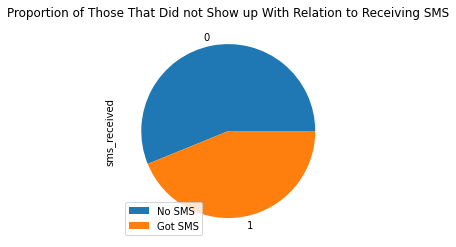

In [28]:
#plot the proportion of those that did not showed up in relation to receiving or not receiving an SMS
df_no["sms_received"].value_counts(normalize=True).plot(kind="pie")
plt.legend(("No SMS","Got SMS"), loc="lower left")
plt.title("Proportion of Those That Did not Show up With Relation to Receiving SMS")

**The charts above shows that receiving an SMS does not increase the chances of showing up for an appointment**

### Which age group has the highest hospital visits?

In [29]:
df["age"].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [30]:
#group ages into categories
bin_edges = [-1, 11, 18, 59, 115]
bin_names = ["child", "adolescent", "adult", "elderly"]

#create an "age_group" column in the dataset
df["age_group"] = pd.cut(df["age"], bin_edges, labels=bin_names)

In [31]:
#confirm if there is a missing value in "age_group"
df["age_group"].isnull().sum()

0

In [32]:
dist = df.age_group.value_counts()

Text(0.5, 1.0, 'Age Distribution of Patients')

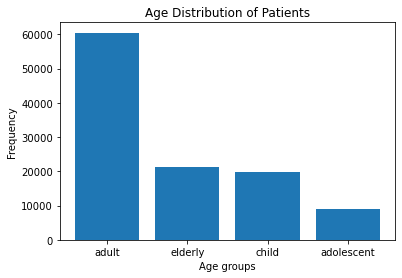

In [33]:
#df.age_group.value_counts().plot(kind="bar")
plt.bar(dist.index, dist)
plt.xlabel("Age groups")
plt.ylabel("Frequency")
plt.title("Age Distribution of Patients")

>The plot above shows that the adults frequent the hospital more than any age group

### Which gender in a particular age group have a higher clinic visit?

In [34]:
df_age_gp =(
    df["age_group"].
    groupby(df["gender"]).
    value_counts(normalize=True).
    rename("frequency").to_frame().
    reset_index()
)

Text(0.5, 1.0, 'Proportion of Hospital visits of each Age-Group by Gender')

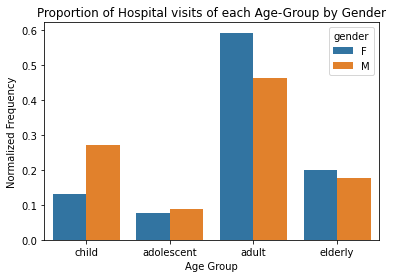

In [35]:
sns.barplot(
    x="age_group",
    y="frequency",
    hue="gender",
    data=df_age_gp,
)
plt.xlabel("Age Group")
plt.ylabel("Normalized Frequency")
plt.title("Proportion of Hospital visits of each Age-Group by Gender")

>The chart above shows females in both the adult and elderly age groups have a higher turn out,
while, the males in the child and adolescent groups where higher.

### Which gender in a particular age group has a higher show up rate?

In [36]:
#check the proportions of show up in various age groups by gender
df.groupby(["age_group", "gender"])["showed_up"].mean()

age_group   gender
child       F         0.798793
            M         0.796686
adolescent  F         0.744148
            M         0.735561
adult       F         0.787690
            M         0.793952
elderly     F         0.843214
            M         0.854487
Name: showed_up, dtype: float64

Text(0.5, 1.0, 'Proportion of Show Up of Each Age Group by Gender')

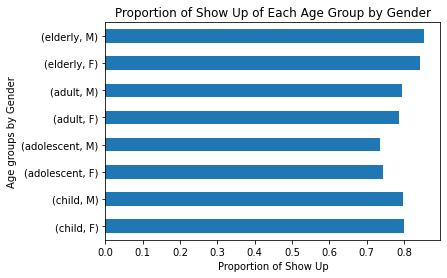

In [37]:
#plot the proportions with horizontal bar chart
df.groupby(["age_group", "gender"])["showed_up"].mean().plot(kind="barh")
plt.xlabel("Proportion of Show Up")
plt.ylabel("Age groups by Gender")
plt.title("Proportion of Show Up of Each Age Group by Gender")

>The chart above shows that elderly males keep more to the follow up. Meanwhile, male adolescents have more no shows


<a id='conclusions'></a>
## Conclusions


> The data set was import in to the local machine and explored, it was noted that there were 110527 rows with 14 features.
There were no null values or duplicates, however, it was noted that some columns were not well labelled. Also, the age column had a negative number. Likewise, the "no-show" column was quite confusing to understand.
> The dataset was cleaned to ensure it was ready for exploration. Unnecessary columns were drops, all columns were made to lower case, while spelling errors were corrected. The "no-show" columns was renamed to "showed_up" and its values were corrected as such. The rows with negative value for age was also dropped.

> The following finding were made:
>> 1. It was noted that the proportion of women with hypertension were more than the males with hypertension.
>> 2. Receiving an SMS reminder might not increase the possibilty of showing up for an appointment.
>> 3. The adults have more clinic visits that the other age groups.
>> 4. Adult females and female elders have a higher visit level.
>> 5. Elderly males have more sjow up rates, while adult males have the lowest rates?

> The limitations are:
>> 1. Most of the variables are categorical, as such hard to make correlations
>> 2. There was a negative value in the age category
>> 3. The "no-show" columns is ambigous and can easily mislead the analyst.